<a href="https://colab.research.google.com/github/SoungbinC/CMPE_255/blob/Assignment6/MusicGenre.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from matplotlib.colors import ListedColormap
%matplotlib inline
import seaborn as sns

In [3]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [4]:
GENERAL_PATH='/content/drive/MyDrive/MusicGenre'
df = pd.read_csv(f'{GENERAL_PATH}/features_3_sec.csv')

In [5]:
df.head()

filename  length  chroma_stft_mean  chroma_stft_var  rms_mean  \
0  blues.00000.0.wav   66149          0.335406         0.091048  0.130405   
1  blues.00000.1.wav   66149          0.343065         0.086147  0.112699   
2  blues.00000.2.wav   66149          0.346815         0.092243  0.132003   
3  blues.00000.3.wav   66149          0.363639         0.086856  0.132565   
4  blues.00000.4.wav   66149          0.335579         0.088129  0.143289   

    rms_var  spectral_centroid_mean  spectral_centroid_var  \
0  0.003521             1773.065032          167541.630869   
1  0.001450             1816.693777           90525.690866   
2  0.004620             1788.539719          111407.437613   
3  0.002448             1655.289045          111952.284517   
4  0.001701             1630.656199           79667.267654   

   spectral_bandwidth_mean  spectral_bandwidth_var  ...  mfcc16_var  \
0              1972.744388           117335.771563  ...   39.687145   
1              2010.051501            65671.875673  ...   64.748276   
2              2084.565132            75124.921716  ...   67.336563   
3              1960.039988            82913.639269  ...   47.739452   
4              1948.503884            60204.020268  ...   30.336359   

   mfcc17_mean  mfcc17_var  mfcc18_mean  mfcc18_var  mfcc19_mean  mfcc19_var  \
0    -3.241280   36.488243     0.722209   38.099152    -5.050335   33.618073   
1    -6.055294   40.677654     0.159015   51.264091    -2.837699   97.030830   
2    -1.768610   28.348579     2.378768   45.717648    -1.938424   53.050835   
3    -3.841155   28.337118     1.218588   34.770935    -3.580352   50.836224   
4     0.664582   45.880913     1.689446   51.363583    -3.392489   26.738789   

   mfcc20_mean  mfcc20_var  label  
0    -0.243027   43.771767  blues  
1     5.784063   59.943081  blues  
2     2.517375   33.105122  blues  
3     3.630866   32.023678  blues  
4     0.536961   29.146694  blues  

[5 rows x 60 columns]

#Explore Data Anaylsis


In [6]:
df.isna().sum()

filename                   0
length                     0
chroma_stft_mean           0
chroma_stft_var            0
rms_mean                   0
rms_var                    0
spectral_centroid_mean     0
spectral_centroid_var      0
spectral_bandwidth_mean    0
spectral_bandwidth_var     0
rolloff_mean               0
rolloff_var                0
zero_crossing_rate_mean    0
zero_crossing_rate_var     0
harmony_mean               0
harmony_var                0
perceptr_mean              0
perceptr_var               0
tempo                      0
mfcc1_mean                 0
mfcc1_var                  0
mfcc2_mean                 0
mfcc2_var                  0
mfcc3_mean                 0
mfcc3_var                  0
mfcc4_mean                 0
mfcc4_var                  0
mfcc5_mean                 0
mfcc5_var                  0
mfcc6_mean                 0
mfcc6_var                  0
mfcc7_mean                 0
mfcc7_var                  0
mfcc8_mean                 0
mfcc8_var     

In [7]:
df.shape
df.label.value_counts().reset_index()

index  label
0      blues   1000
1       jazz   1000
2      metal   1000
3        pop   1000
4     reggae   1000
5      disco    999
6  classical    998
7     hiphop    998
8       rock    998
9    country    997

In [8]:
df.describe()

length  chroma_stft_mean  chroma_stft_var     rms_mean       rms_var  \
count   9990.0       9990.000000      9990.000000  9990.000000  9.990000e+03   
mean   66149.0          0.379534         0.084876     0.130859  2.676388e-03   
std        0.0          0.090466         0.009637     0.068545  3.585628e-03   
min    66149.0          0.107108         0.015345     0.000953  4.379535e-08   
25%    66149.0          0.315698         0.079833     0.083782  6.145900e-04   
50%    66149.0          0.384741         0.085108     0.121253  1.491318e-03   
75%    66149.0          0.442443         0.091092     0.176328  3.130862e-03   
max    66149.0          0.749481         0.120964     0.442567  3.261522e-02   

       spectral_centroid_mean  spectral_centroid_var  spectral_bandwidth_mean  \
count             9990.000000           9.990000e+03              9990.000000   
mean              2199.219431           4.166727e+05              2241.385959   
std                751.860611           4.349644e+05               543.854449   
min                472.741636           8.118813e+02               499.162910   
25%               1630.680158           1.231961e+05              1887.455790   
50%               2208.628236           2.650692e+05              2230.575595   
75%               2712.581884           5.624152e+05              2588.340505   
max               5432.534406           4.794119e+06              3708.147554   

       spectral_bandwidth_var  rolloff_mean  ...  mfcc16_mean   mfcc16_var  \
count            9.990000e+03   9990.000000  ...  9990.000000  9990.000000   
mean             1.182711e+05   4566.076592  ...     1.448240    49.988755   
std              1.013505e+05   1642.065335  ...     5.735149    34.442816   
min              1.183520e+03    658.336276  ...   -26.850016     1.325786   
25%              4.876553e+04   3378.311110  ...    -2.227478    29.584894   
50%              8.996072e+04   4631.377892  ...     1.461623    41.702393   
75%              1.585674e+05   5591.634521  ...     5.149752    59.274619   
max              1.235143e+06   9487.446477  ...    39.144405   683.932556   

       mfcc17_mean   mfcc17_var  mfcc18_mean   mfcc18_var  mfcc19_mean  \
count  9990.000000  9990.000000  9990.000000  9990.000000  9990.000000   
mean     -4.198706    51.962753     0.739943    52.488851    -2.497306   
std       5.677379    36.400669     5.181313    38.177120     5.111799   
min     -27.809795     1.624544   -20.733809     3.437439   -27.448456   
25%      -7.951722    29.863448    -2.516638    29.636197    -5.734123   
50%      -4.443021    42.393583     0.733772    41.831377    -2.702366   
75%      -0.726945    61.676964     3.888734    62.033906     0.514246   
max      34.048843   529.363342    36.970322   629.729797    31.365425   

        mfcc19_var  mfcc20_mean   mfcc20_var  
count  9990.000000  9990.000000  9990.000000  
mean     54.973829    -0.917584    57.322614  
std      41.585677     5.253243    46.444212  
min       3.065302   -35.640659     0.282131  
25%      30.496412    -4.004475    30.011365  
50%      43.435253    -1.030939    44.332155  
75%      65.328602     2.216603    68.210421  
max    1143.230591    34.212101   910.473206  

[8 rows x 58 columns]

In [9]:
genres=df['label'].unique()
print(genres)

['blues' 'classical' 'country' 'disco' 'hiphop' 'jazz' 'metal' 'pop'
 'reggae' 'rock']


In [11]:
import os
import random
visualize_audio_path = {}
for genre in genres:
    audio_files = [file for file in os.listdir(f'{GENERAL_PATH}/genres_original/{genre}') if file.endswith('.wav')]
    visualize_audio_path[genre] = audio_files



In [12]:
random_audio_selection = {}
for genre, files in visualize_audio_path.items():
    random_audio = random.choice(files)
    random_audio_selection[genre] = random_audio

random_audio_selection

{'blues': 'blues.00001.wav',
 'classical': 'classical.00080.wav',
 'country': 'country.00035.wav',
 'disco': 'disco.00029.wav',
 'hiphop': 'hiphop.00059.wav',
 'jazz': 'jazz.00044.wav',
 'metal': 'metal.00012.wav',
 'pop': 'pop.00064.wav',
 'reggae': 'reggae.00019.wav',
 'rock': 'rock.00066.wav'}

In [14]:
import librosa
import librosa.display
from IPython.display import Audio
import tensorflow as tf
audios={}
sample_rates={}
for audio in random_audio_selection.keys():
    audio_path=f'{GENERAL_PATH}/genres_original/{audio}/{random_audio_selection[audio]}'
    data,sr=librosa.load(audio_path,sr=45600)
    audios[audio]=data
    sample_rates[f'{audio}:sr']=sr

In [16]:
Audio(audios['country'],rate=sample_rates['country:sr'])

Visualize

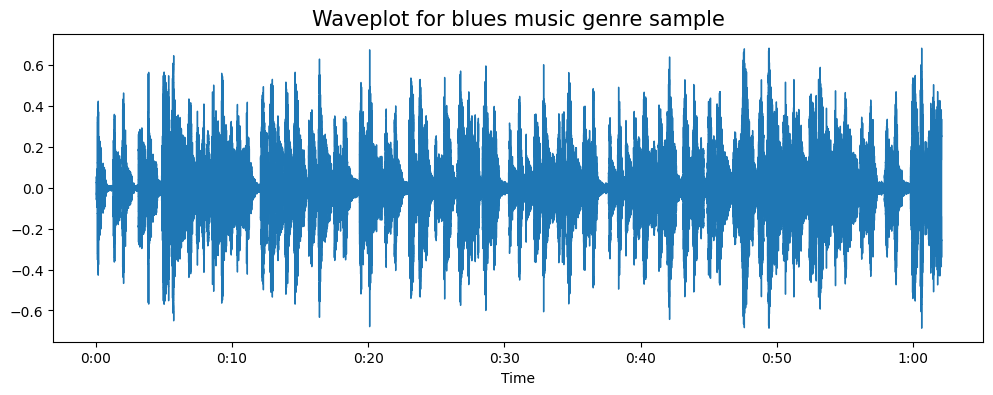

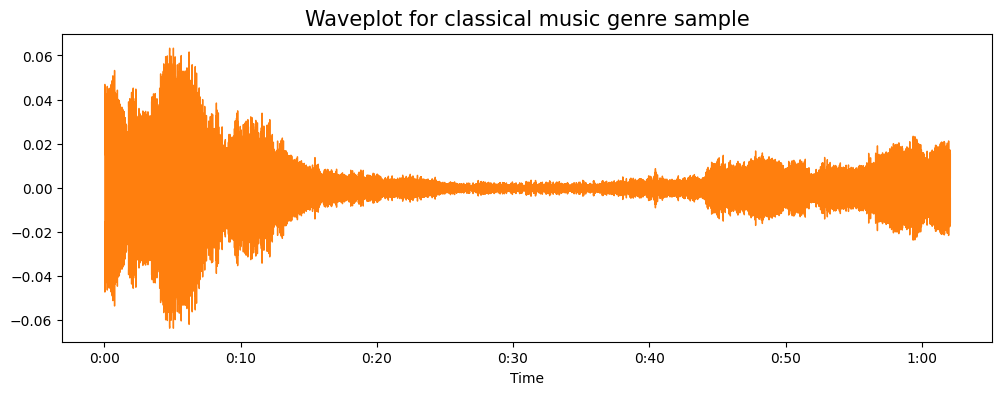

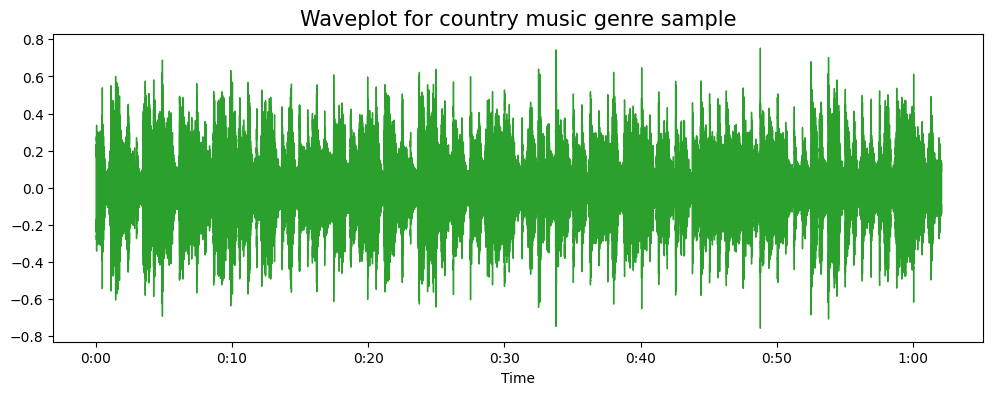

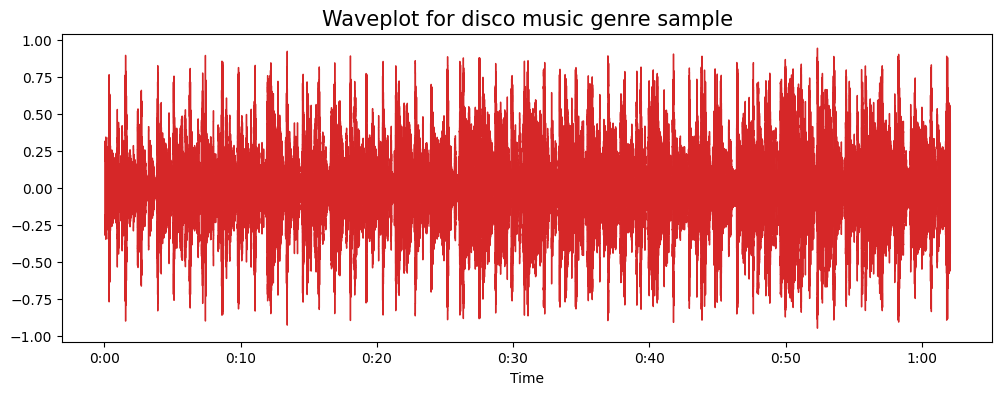

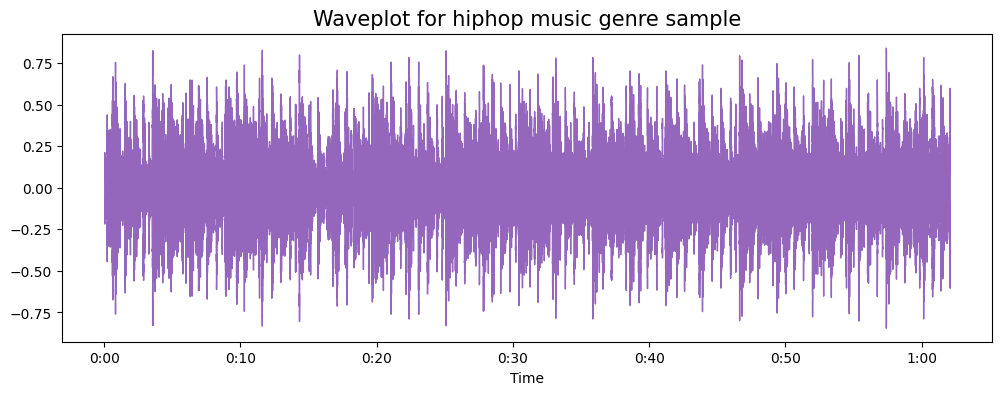

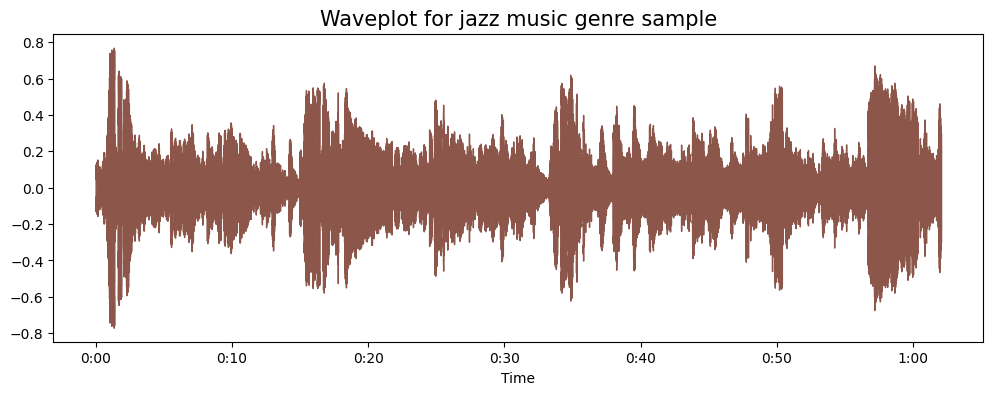

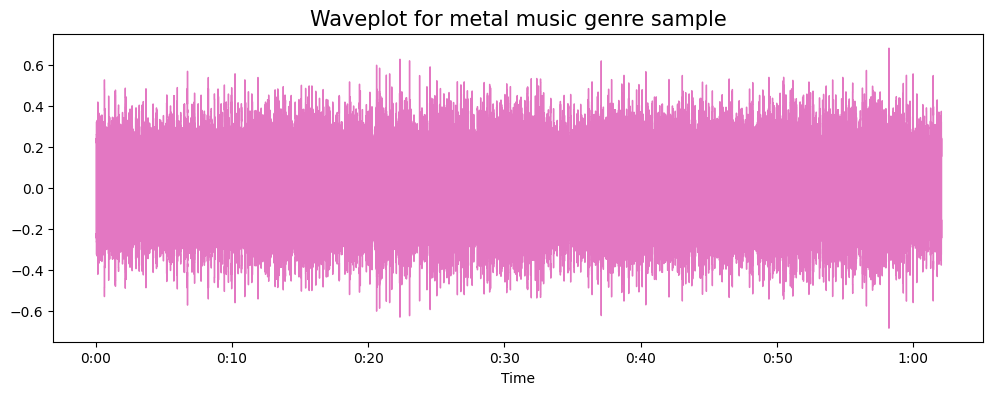

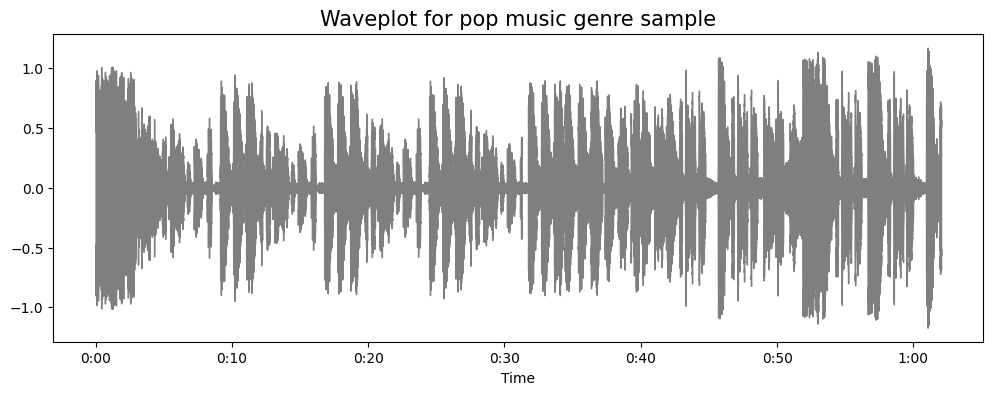

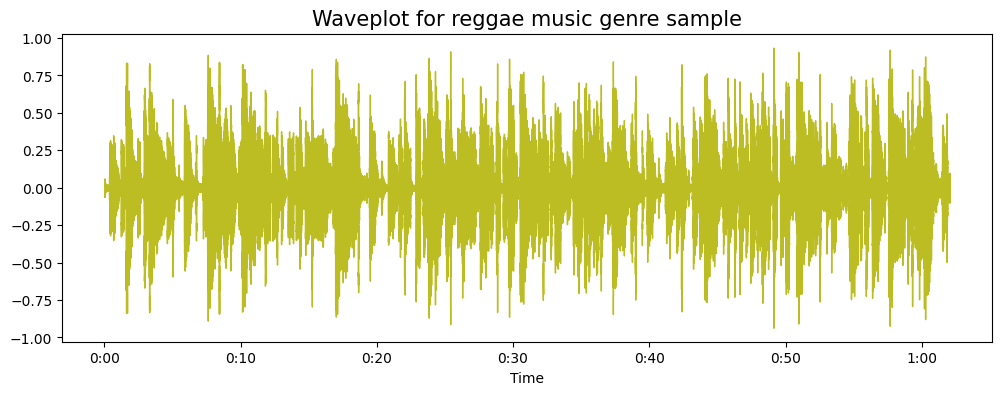

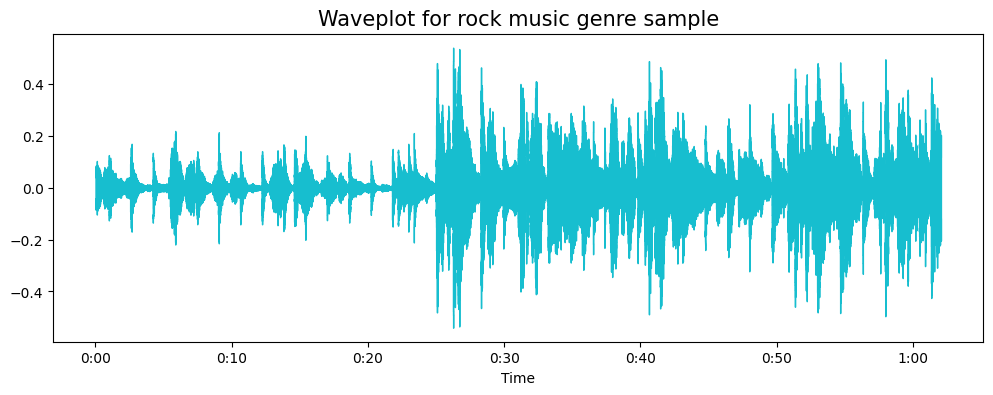

In [17]:
colors = {
    'blues': '#1F77B4',
    'classical': '#FF7F0E',
    'country': '#2CA02C',
    'disco': '#D62728',
    'hiphop': '#9467BD',
    'jazz': '#8C564B',
    'metal': '#E377C2',
    'pop': '#7F7F7F',
    'reggae': '#BCBD22',
    'rock': '#17BECF'
}
for audio in audios.keys():
    plt.figure(figsize=(12,4))
    plt.title(f'Waveplot for {audio} music genre sample',size=15)
    librosa.display.waveshow(audios[audio],color=colors[audio])
    print('\n')
    plt.show()

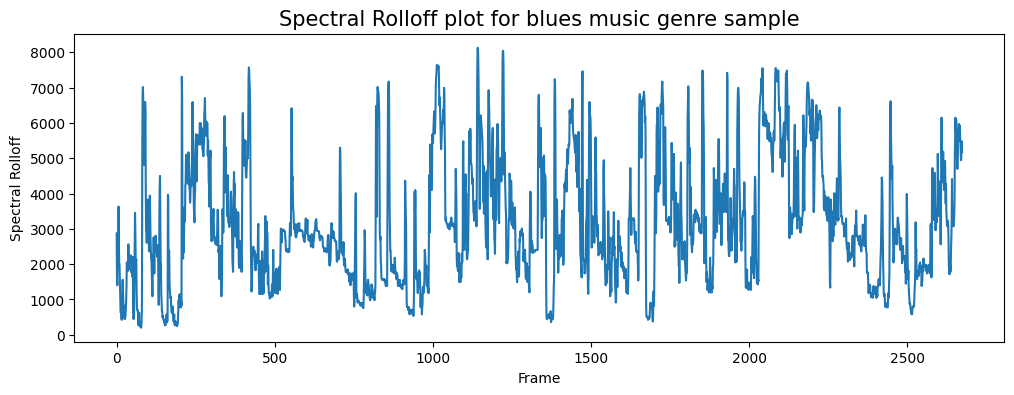

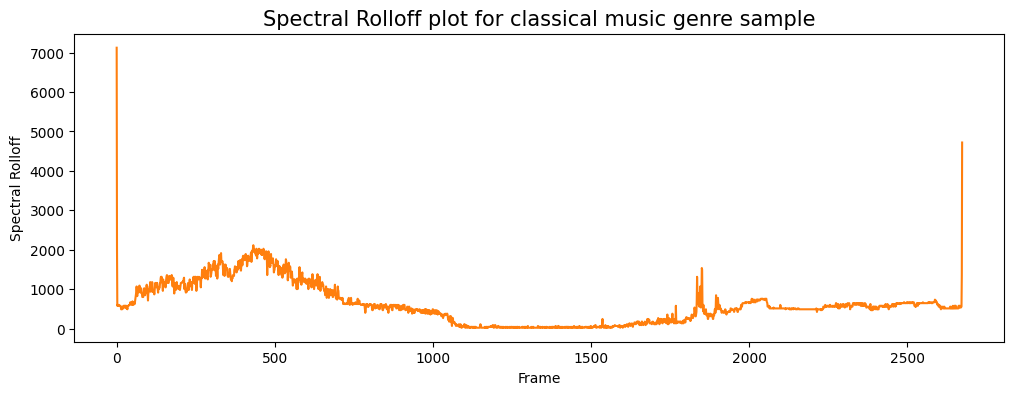

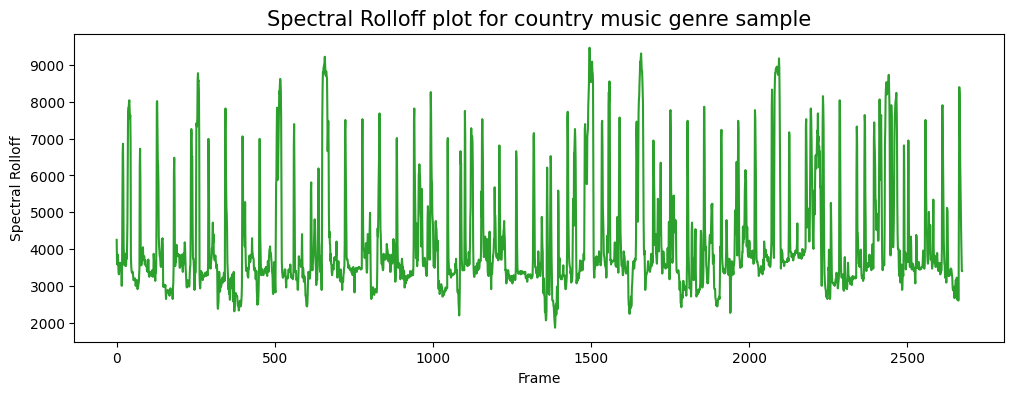

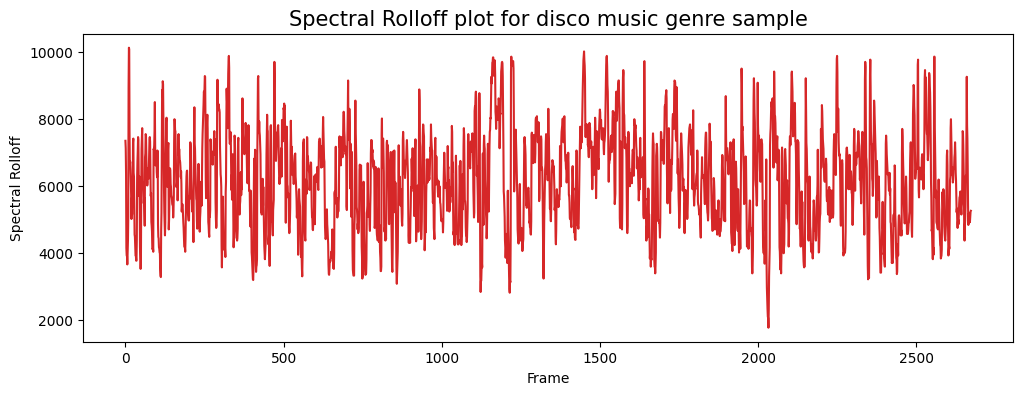

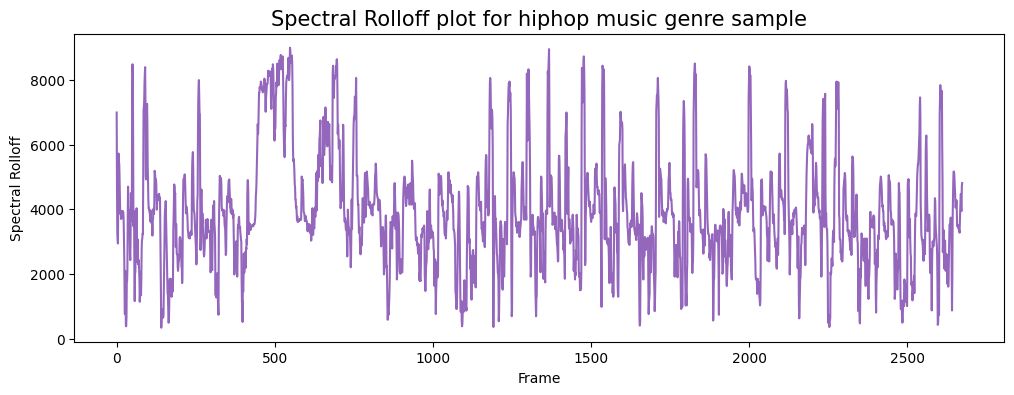

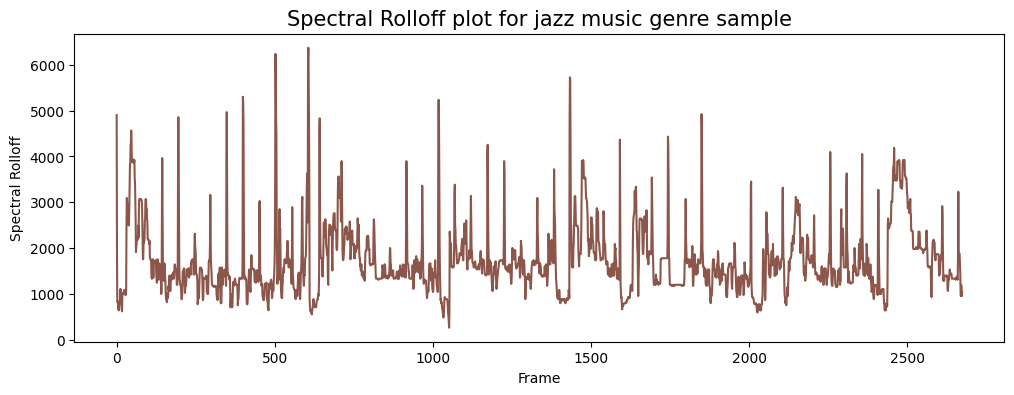

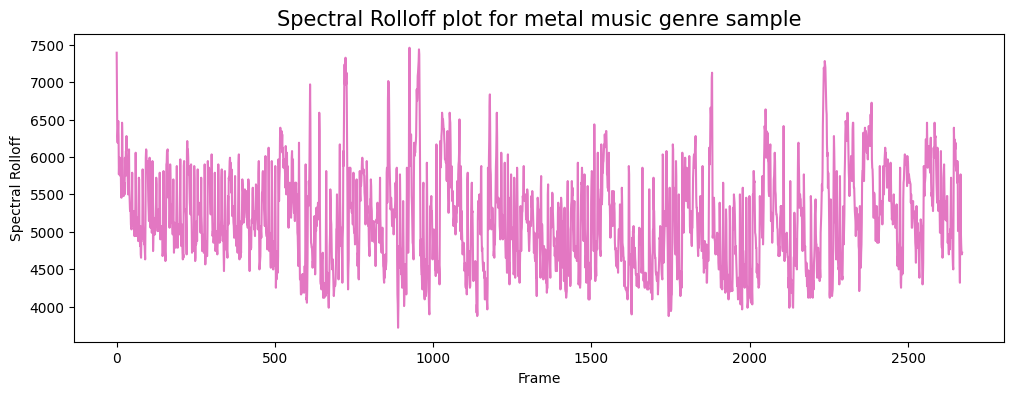

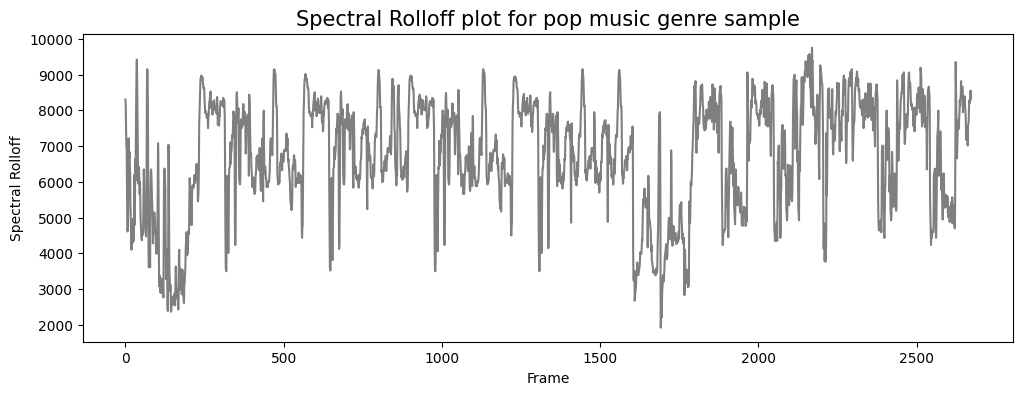

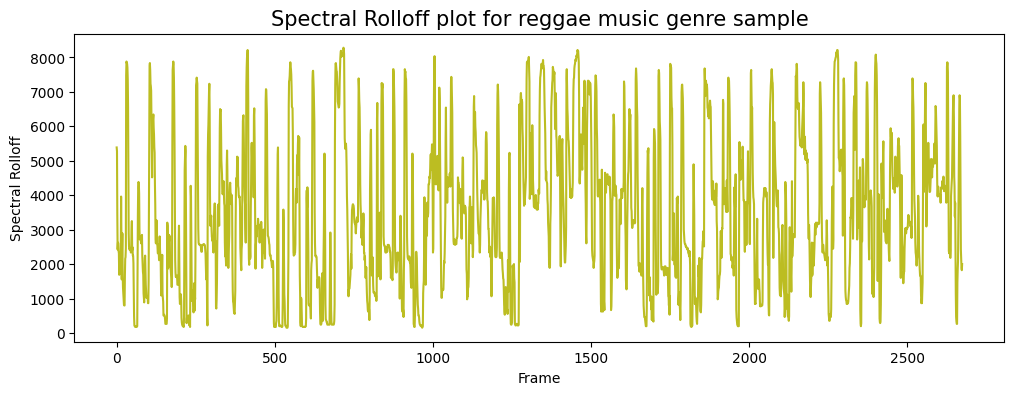

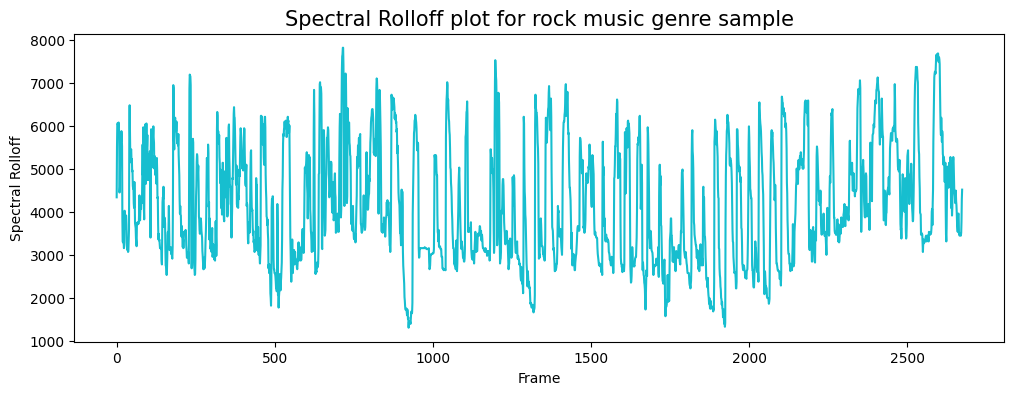

In [18]:
for audio in zip(audios.keys(), sample_rates.keys()):
    spectral_rolloff = librosa.feature.spectral_rolloff(y=audios[audio[0]] + 0.01, sr=sample_rates[audio[1]])[0]
    plt.figure(figsize=(12, 4))
    plt.title(f'Spectral Rolloff plot for {audio[0]} music genre sample', size=15)
    plt.plot(spectral_rolloff, color=colors[audio[0]])
    plt.xlabel('Frame')
    plt.ylabel('Spectral Rolloff')
    plt.show()

#Build Models


In [19]:
!pip install pycaret

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 483.9/483.9 kB 7.2 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 34.4/34.4 MB 38.8 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 159.4/159.4 kB 18.2 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 81.9/81.9 kB 10.0 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 79.9/79.9 MB 2.0 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 106.8/106.8 kB 11.2 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 73.4/73.4 kB 8.6 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 17.1/17.1 MB 61.1 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 44.0/44.0 kB 5.2 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 2.1/2.1 MB 74.5 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.6/1.6 MB 57.0 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 10.4/10.4 MB 87.7 MB/s e

In [20]:
from pycaret.classification import *
s = setup(df, session_id = 123)

In [21]:
best = compare_models()

Processing:   0%|          | 0/65 [00:00<?, ?it/s]

In [22]:
print(best)

RidgeClassifier(alpha=1.0, class_weight=None, copy_X=True, fit_intercept=True,
                max_iter=None, positive=False, random_state=123, solver='auto',
                tol=0.0001)


In [23]:
evaluate_model(best)

interactive(children=(ToggleButtons(description='Plot Type:', icons=('',), options=(('Pipeline Plot', 'pipelin…

In [24]:
predictions = predict_model(best, data=df)
predictions.head()

filename  length  chroma_stft_mean  chroma_stft_var  rms_mean  \
0  blues.00000.0.wav   66149          0.335406         0.091048  0.130405   
1  blues.00000.1.wav   66149          0.343065         0.086147  0.112699   
2  blues.00000.2.wav   66149          0.346815         0.092243  0.132003   
3  blues.00000.3.wav   66149          0.363639         0.086856  0.132565   
4  blues.00000.4.wav   66149          0.335579         0.088129  0.143289   

    rms_var  spectral_centroid_mean  spectral_centroid_var  \
0  0.003521             1773.065063          167541.625000   
1  0.001450             1816.693726           90525.687500   
2  0.004620             1788.539673          111407.437500   
3  0.002448             1655.289062          111952.281250   
4  0.001701             1630.656250           79667.265625   

   spectral_bandwidth_mean  spectral_bandwidth_var  ...  mfcc17_mean  \
0              1972.744385           117335.773438  ...    -3.241280   
1              2010.051514            65671.875000  ...    -6.055294   
2              2084.565186            75124.921875  ...    -1.768610   
3              1960.040039            82913.640625  ...    -3.841155   
4              1948.503906            60204.019531  ...     0.664582   

   mfcc17_var  mfcc18_mean  mfcc18_var  mfcc19_mean  mfcc19_var  mfcc20_mean  \
0   36.488243     0.722209   38.099152    -5.050335   33.618073    -0.243027   
1   40.677654     0.159015   51.264091    -2.837699   97.030830     5.784063   
2   28.348579     2.378768   45.717648    -1.938424   53.050835     2.517375   
3   28.337118     1.218588   34.770935    -3.580352   50.836224     3.630866   
4   45.880913     1.689446   51.363583    -3.392489   26.738789     0.536961   

   mfcc20_var  label  prediction_label  
0   43.771767      0             blues  
1   59.943081      0             blues  
2   33.105122      0              jazz  
3   32.023678      0             disco  
4   29.146694      0           country  

[5 rows x 61 columns]